<a href="https://colab.research.google.com/github/sk1252k5/deeplearning_TF_Keras/blob/main/Churn_prediction/Chur_model_2_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the necessary libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Load the Data

In [ ]:
df = pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Data Pre-Processing and Analysis**

In [ ]:
df.drop(['CustomerId','Surname'],axis='columns',inplace=True)
df.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.dtypes

RowNumber            int64
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
df.Gender.replace({'Female':0,'Male':1},inplace=True)
df.dtypes

RowNumber            int64
CreditScore          int64
Geography           object
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
df1 = pd.get_dummies(data=df, columns=['Geography'])
df1.columns

Index(['RowNumber', 'CreditScore', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [ ]:
df1.dtypes

RowNumber              int64
CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France        bool
Geography_Germany       bool
Geography_Spain         bool
dtype: object

In [ ]:
df1.Geography_France.unique()

array([ True, False])

In [ ]:
col_to_r = ['Geography_France','Geography_Germany','Geography_Spain']
for col in col_to_r:
  df1[col] = df1[col].astype(int)

In [ ]:
df1.dtypes

RowNumber              int64
CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       int64
Geography_Germany      int64
Geography_Spain        int64
dtype: object

In [ ]:
df1.head()

,RowNumber,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,1,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,2,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,4,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,5,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [ ]:
df1.Geography_France.unique()

array([1, 0])

In [ ]:
for col in df1:
  print(f'{col}: {df1[col].unique()}')

RowNumber: [    1     2     3 ...  9998  9999 10000]
CreditScore: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 6

Scaling the Data

In [ ]:
cols_to_scale = ['CreditScore','Age','Tenure','Balance','EstimatedSalary','NumOfProducts']
#importing the nessary libaries to scale the dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [ ]:
df1.drop('RowNumber',axis='columns',inplace=True)

In [ ]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1


In [ ]:
# splitting the train and test data
x_train,x_test,y_train,y_test=train_test_split(df1.drop('Exited',axis='columns'),df1['Exited'],test_size=0.2,random_state=5)

In [ ]:
x_train.shape

(8000, 12)

In [ ]:
y_train.shape

(8000,)

In [ ]:
x_test.shape

(2000, 12)

**Build a model (ANN) in tensorflow/keras**

In [ ]:
# Building the ANN for the given dataset
model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(12,),activation='relu'),
    keras.layers.Dense(12,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
250/250 [==============================] - 2s 3ms/step - loss: 0.5112 - accuracy: 0.7960
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4687 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4537 - accuracy: 0.7999
Epoch 4/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4421 - accuracy: 0.8121
Epoch 5/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4345 - accuracy: 0.8123
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4301 - accuracy: 0.8160
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4254 - accuracy: 0.8180
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4209 - accuracy: 0.8194
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4159 - accuracy: 0.8224
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4108 - accura

In [ ]:
model.evaluate(x_test,y_test)

63/63 [==============================] - 0s 3ms/step - loss: 0.3539 - accuracy: 0.8530


[0.35392433404922485, 0.8529999852180481]

In [ ]:
y_p = model.predict(x_test)
y_p[:5]

63/63 [==============================] - 0s 1ms/step


array([[0.02985784],
       [0.08203288],
       [0.08419441],
       [0.09861068],
       [0.07428598]], dtype=float32)

In [ ]:
y_pred=[]
for element in y_p:
  if element > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [ ]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [ ]:
y_test[:10]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
Name: Exited, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))

[[1513   82]
 [ 212  193]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1595
           1       0.70      0.48      0.57       405

    accuracy                           0.85      2000
   macro avg       0.79      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



Text(95.72222222222221, 0.5, 'Truth')

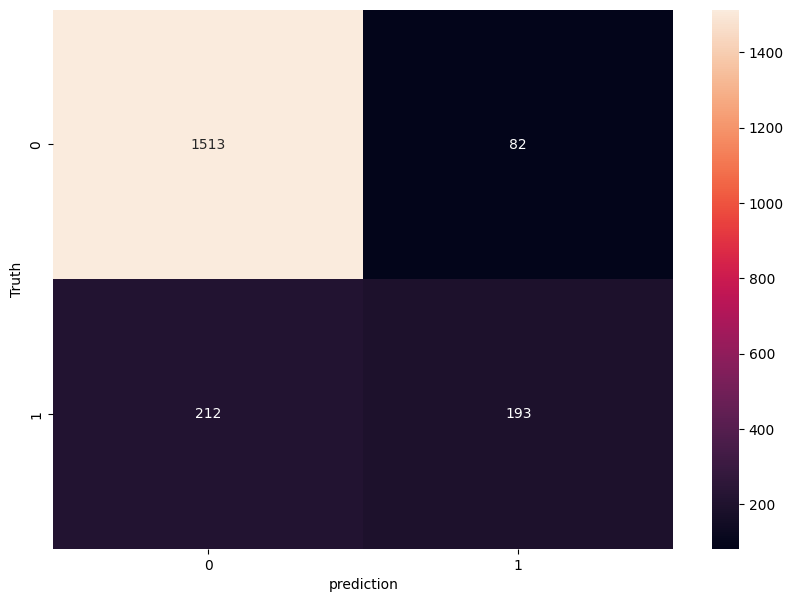

In [33]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('prediction')
plt.ylabel('Truth')

In [34]:
round((1513+193)/(1513+212+193+82),2) # accuracy by manually

0.85

Precision for 0 and 1 Mannualy

In [39]:
round(1513/(1513+212),2) # precision for 0

0.88

In [40]:
round(193/(193+82),2) # precision for 1

0.7

Recall score for 0 and 1 Mannualy

In [37]:
round(1513/(1513+82),2) # recall score for 0

0.95

In [38]:
round(193/(193+212),2) # recall score for 1

0.48